In [4]:
import distutils.util as distutils
import os
import mujoco
import time
import itertools
import numpy as np
import matplotlib.pyplot as plt
import mediapy as media

all_variables = dir()
for name in all_variables:
    
    # Print the item if it doesn't start with '__'
    if not name.startswith('__'):
        if name == 'renderer':
            del renderer
        elif name == 'xml':
            del xml
        elif name == 'model':
            del model
        elif name == 'data':
            del data

In [5]:
def init_controller(model,data):
    #initialize the controller here. This function is called once, in the beginning
    pass

def controller(model, data):
    #put the controller here. This function is called inside the simulation.
    #pass

    #spring-like position servo
    # set_position_servo(1, 10)
    # data.ctrl[1] = np.pi  #position

    #speed control; velocity servo
    # set_velocity_servo(2,100)
    # data.ctrl[2] = 0.5  #velocity

    #position control; position/velocity servo
    # set_position_servo(1, 100)
    # set_velocity_servo(2,10)
    # data.ctrl[1] = np.pi #position

    #torque control;
    set_torque_servo(0, 1)
    # data.ctrl[0] = -10*(data.qpos[0]-np.pi)  #torque (spring)
    # data.ctrl[0] = -100*(data.qvel[0]-0.5) #speed control]
    data.ctrl[0] = -100*(data.qpos[0]-np.pi) -10*data.qvel[0] #position control

def set_torque_servo(actuator_no, flag):
    if (flag==0):
        model.actuator_gainprm[actuator_no, 0] = 0
    else:
        model.actuator_gainprm[actuator_no, 0] = 1

def set_position_servo(actuator_no, kp):
    model.actuator_gainprm[actuator_no, 0] = kp
    model.actuator_biasprm[actuator_no, 1] = -kp

def set_velocity_servo(actuator_no, kv):
    model.actuator_gainprm[actuator_no, 0] = kv
    model.actuator_biasprm[actuator_no, 2] = -kv

""

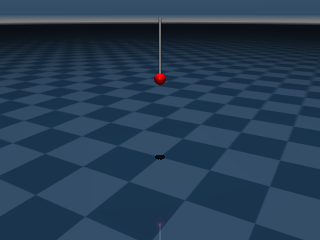

In [7]:
model = mujoco.MjModel.from_xml_path('model/2D_simple_pendulum.xml')
data = mujoco.MjData(model)
renderer = None
renderer = mujoco.Renderer(model)
mujoco.mj_forward(model, data)
renderer.update_scene(data)
media.show_image(renderer.render())